# Chaining Bayes’ rule

In this lecture, we will discuss chaining Bayes' rule with a drug screening scenario using Python. Interpreting Bayes’ rule as an incremental, cumulative learning rule would be interesting to many researchers and geeks in academia. The best thing about Bayesian inference is the ability to use prior knowledge in the form of a prior probability term in the numerator of the Bayes’ theorem. First, we look at the graphical representation of how chaining Bayes' rule get to work.

![](assets/chaining_bayes_rule.png)


The prior knowledge starts from nothing or initial belief, to the probability derived from an experiment. If that is the latter case, the probability is fed back to iteratively update the belief using the Bayes’ rule. This is called the chaining of Bayes’ rule, in which the probability is updated every time when new data comes in. In other words, the posterior probability of the previous experiment is fed back to the system as the prior distribution for the next iteration. In the long run, as the data becomes voluminous, the posterior distribution of each experiment becomes more and more robust and stable.

## Bayesian Inference about Drug screening
	
We’ll apply the Bayes’ rule to a problem of drug screening. A drug screening test looks for the presence of one or more illegal or prescription drugs in one’s urine, blood, saliva, hair, or sweat. To promote a drug-free work environment, it is used to determine if a prospective hire or employee who is returning to work after an injury or absence uses illicit substances or abuses prescription medication.

Question prompt: Suppose that a test for using a particular drug is 97% sensitive and 95% specific. That is, the test will produce 97% true positive results for drug users and 95% true negative results for non-drug users. Suppose we also know that 1% of the general population are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

Concepts: A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

As you can tell that the knowledge "1% of the general population are drug users" stands for the prior knowledge, here it’s a piece of generalized knowledge about the common prevalence rate that informs the prior probability of a random test individual being a drug user. This prior knowledge means that if we choose a random person from the general population without any testing, we can only say that there is a 1% chance of that person being a drug-user. So now we face the problem: How to use Bayes’ rule then given this situation? Let’s pause the video a bit and brainstorm some of the ideas to deal with this problem. 

Here is our approach. We will start with writing a custom function that accepts the test accuracies and the prior knowledge of drug user percentage as input and produces the output probability of a test-taker being a user based on a positive result. Here’s a graphical representation for how to compute the probability that a randomly selected individual with a positive test is a drug user as per the Bayes’ rule.

![](assets/drug_screening_bayes_rule.png)

We directly apply the Bayes' rule to compute the posterior distribution, which is the probability that a positive test-taker is indeed a drug taker. Next we should call these terms in the Bayes’ rule with specific terminologies:
* $P(User)$ is the prevalence rate, which is our prior distribution
* $P(Nonuser)$ is the complement of prevalence rate, given by 1 - P(User)
* $P(Positive|User)$ is the sensitivity, the true positive rate
* $P(Negative|Nonuser)$ is the specificity, the true negative rate
* $P(Positive|Nonuser)$ is the complement of specificity, given by 1 - P(Negative|Nonuser)

In [ ]:
# Regarding the problem, we define a function called drug_user to compute the posterior distribution using the Bayes' rule.
def drug_user(prob_theta = 0.5,
              sensitivity = 0.97,
              specificity = 0.95,
              prevalence = 0.01,
              verbose = True):
    """Compute the posterior using the Bayes' rule.
    Verbose is a general programming term for produce lots of logging output.
    You can think of it as asking the program to "tell me everything about what you are doing all the time".
    Just set it to true and see what happens."""

    p_user = prevalence
    p_non_user = 1 - prevalence
    p_positive_user = sensitivity
    p_negative_non_user = specificity
    p_positive_non_user = 1 - specificity

    num = p_positive_user * p_user
    den = p_positive_user * p_user + p_positive_non_user * p_non_user

    prob = num/den

    if verbose:
        if prob > prob_theta:
            print("The test-taker could be a drug user.")

        else:
            print("The test-taker may not be a drug user.")
    return prob

p = drug_user(prob_theta = 0.5,
              sensitivity = 0.97,
              specificity = 0.95,
              prevalence = 0.01)

print("Probability of the test-taker being a drug user is:", round(p,3))


The test-taker may not be a drug user.
Probability of the test-taker being a drug user is: 0.164


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

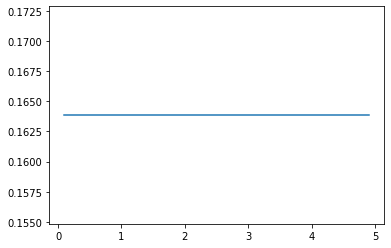

In [ ]:
ps = []
pres = []
for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = drug_user(prob_theta = 0.5,
                  sensitivity = 0.97,
                  specificity = 0.95,
                  prevalence = 0.01,
                  verbose = False)
    ps.append(p)
import seaborn as sns

sns.lineplot(pres, ps)

In [ ]:
p = drug_user(prob_theta = 0.5,
              sensitivity = 0.97,
              specificity = 0.95,
              prevalence = 0.01)

print("Probability of the test-taker being a drug user is:", round(p,3))

p2 = drug_user(prob_theta = 0.5,
              sensitivity = 0.97,
              specificity = 0.95,
              prevalence = p)

print("Probability of the test-taker being a drug user, in the second round of test is:", round(p2,3))

p3 = drug_user(prob_theta = 0.5,
              sensitivity = 0.97,
              specificity = 0.95,
              prevalence = p2)

print("Probability of the test-taker being a drug user, in the third round of test is:", round(p3,3))


The test-taker may not be a drug user.
Probability of the test-taker being a drug user is: 0.164
The test-taker could be a drug user.
Probability of the test-taker being a drug user, in the second round of test is: 0.792
The test-taker could be a drug user.
Probability of the test-taker being a drug user, in the third round of test is: 0.987


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Relationship between prevalence rate and probability of identifying drug takers for the very first screening'),
 Text(0.5, 0, 'Prevalence rate in percentage'),
 Text(0, 0.5, 'Probability of test-taker a drug user')]

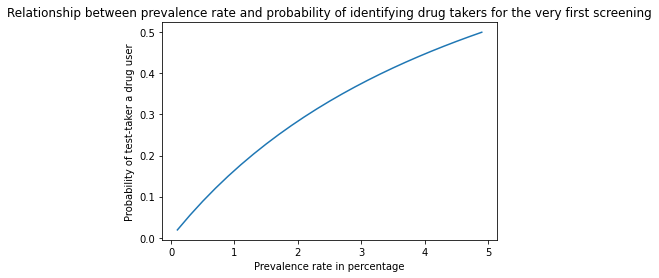

In [ ]:
import seaborn as sns
# Visualize the relationship between prior belief (prevalence rate) and
# probability of identifying drug takers for the very first screening
ps = []
pres = []
for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = drug_user(prob_theta = 0.5,
                  sensitivity = 0.97,
                  specificity = 0.95,
                  prevalence = pre,
                  verbose = False)
    ps.append(p)

sns.lineplot(pres, ps).set(title = 'Relationship between prevalence rate and probability of identifying drug takers for the very first screening',
                           xlabel = 'Prevalence rate in percentage',
                           ylabel = 'Probability of test-taker a drug user')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Relationship between sensitivity and probability of identifying drug takers'),
 Text(0.5, 0, 'Sensitivity'),
 Text(0, 0.5, 'Probability of test-taker a drug user')]

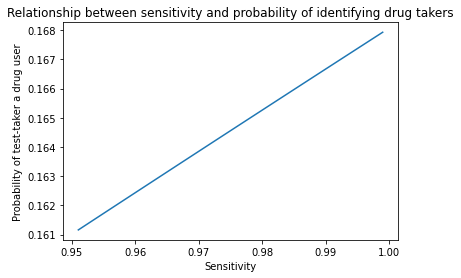

In [ ]:
# Visualize the relationship between prior belief (prevalence rate) and
# probability of identifying drug takers for the very first screening
ps = []
sens = []
for sen in [i*0.001 + 0.95 for i in range(1,50,2)]:
    sens.append(sen)
    p = drug_user(prob_theta = 0.5,
                  sensitivity = sen,
                  specificity = 0.95,
                  prevalence = 0.01,
                  verbose = False)
    ps.append(p)
sns.lineplot(sens, ps).set(title = 'Relationship between sensitivity and probability of identifying drug takers',
                           xlabel = 'Sensitivity',
                           ylabel = 'Probability of test-taker a drug user')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Relationship between specificity and probability of identifying drug takers'),
 Text(0.5, 0, 'Specificity'),
 Text(0, 0.5, 'Probability of test-taker a drug user')]

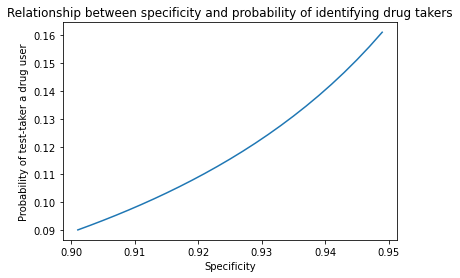

In [ ]:
# Visualize the relationship between prior belief (prevalence rate) and
# probability of identifying drug takers for the very first screening
ps = []
specs = []
for spec in [i*0.001 + 0.90 for i in range(1,50,2)]:
    specs.append(spec)
    p = drug_user(prob_theta = 0.5,
                  sensitivity = 0.97,
                  specificity = spec,
                  prevalence = 0.01,
                  verbose = False)
    ps.append(p)
sns.lineplot(specs, ps).set(title = 'Relationship between specificity and probability of identifying drug takers',
                           xlabel = 'Specificity',
                           ylabel = 'Probability of test-taker a drug user')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>